In [1]:
import pandas as pd
import plotly.express as px
import readdata

### Global temperature anomalies for 1880 to 2023

Changes in annual temperature compared to the average 1951 to 1980
We will be looking at the column JJA which is the average temperature for June, July and August, the meteorological summer in the Northern Hemisphere

In [2]:
title, df = readdata.read_GLB()
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-.15,-.23,-.22,-.17,-.17,***,***,-0.12,-0.16,-.20
1,1881,-0.19,-0.14,0.03,0.05,0.06,-0.18,0.00,-0.04,-.15,-.22,-.18,-.07,-.09,-.10,-.17,0.05,-0.07,-.19
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.16,-0.07,-.14,-.24,-.17,-.36,-.11,-.09,.08,-0.09,-0.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.06,-0.14,-.21,-.11,-.23,-.11,-.17,-.19,-.34,-0.16,-0.09,-.18
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-.27,-.25,-.33,-.31,-.28,-.27,-.11,-0.36,-0.31,-.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.93,0.95,1.17,1.02,0.85,0.90,0.94,0.95,.93,1.01,.99,1.09,.98,.96,.93,1.01,0.93,.98
140,2020,1.17,1.24,1.17,1.13,1.02,0.92,0.90,0.87,.99,.89,1.10,.81,1.02,1.04,1.17,1.11,0.90,.99
141,2021,0.81,0.64,0.89,0.75,0.78,0.84,0.92,0.82,.93,1.00,.94,.86,.85,.84,.76,0.81,0.86,.95
142,2022,0.91,0.89,1.05,0.84,0.84,0.92,0.94,0.95,.90,.97,.73,.79,.89,.90,.89,0.91,0.94,.86


### Colour-coded vertical bar chart in Plotly


In [3]:
period = 'JJA'
scale = 'inferno'
px.bar(df, x='Year', y = period, color="JJA", title = f"{title} - {period}", color_continuous_scale=scale, template='plotly_dark')

In [4]:
c = px.line(df, x='Year', y = period,  title = f"{title} - {period}", template='plotly_dark')
c

### Global CO2 Emissions, 1850 to 2021

In [5]:
f = "https://raw.githubusercontent.com/alanjones2/CO2/master/data/world_df.csv"
co2 = pd.read_csv(f)
co2

,Entity,Code,Year,Annual CO₂ emissions,Annual CO₂ emissions including land-use change,Annual CO₂ emissions from land-use change
0,World,OWID_WRL,1850,1.968960e+08,2.621609e+09,2.424713e+09
1,World,OWID_WRL,1851,1.988050e+08,2.711943e+09,2.513138e+09
2,World,OWID_WRL,1852,2.075509e+08,2.758550e+09,2.550999e+09
3,World,OWID_WRL,1853,2.172092e+08,2.825733e+09,2.608524e+09
4,World,OWID_WRL,1854,2.551390e+08,2.886013e+09,2.630874e+09
...,...,...,...,...,...,...
167,World,OWID_WRL,2017,3.609674e+10,4.042868e+10,4.331947e+09
168,World,OWID_WRL,2018,3.682651e+10,4.100787e+10,4.181357e+09
169,World,OWID_WRL,2019,3.708256e+10,4.163984e+10,4.557283e+09
170,World,OWID_WRL,2020,3.526409e+10,3.932185e+10,4.057758e+09


In [6]:
t = px.line(co2, x='Year', y = "Annual CO₂ emissions", title = "CO2", template='plotly_dark')
t


In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df['Year'], y=df['JJA'], name="Temp anomaly"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=co2['Year'], y=co2['Annual CO₂ emissions'], name="Annual CO₂ emissions"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Temperature / Annual CO₂ emissions"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Temperature ºC", secondary_y=False)
fig.update_yaxes(title_text="CO2 Emissions tonnes", secondary_y=True)
fig.update_layout(template='plotly_dark')

fig.show()

### Create a rolling average

I've chosen 5 years as a period over which to create the rolling average - this is an arbitrary number that seems to give a reasonable result.

The longer the period, the smoother the line will be. 

In [8]:
df['mov_avg'] = df['JJA'].rolling(5).sum() # create an average over 5 years


t = px.line(df, x='Year', y = "mov_avg", title = f"CO2", template='plotly_dark')
t

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df['Year'], y=df['mov_avg'], name="Temp anomaly"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=co2['Year'], y=co2['Annual CO₂ emissions'], name="CO2 Emissions"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Temperature / CO2 Emissions"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="Temperature ºC", secondary_y=False)
fig.update_yaxes(title_text="CO2 Emissions tonnes", secondary_y=True)
fig.update_layout(template='plotly_dark')

fig.show()

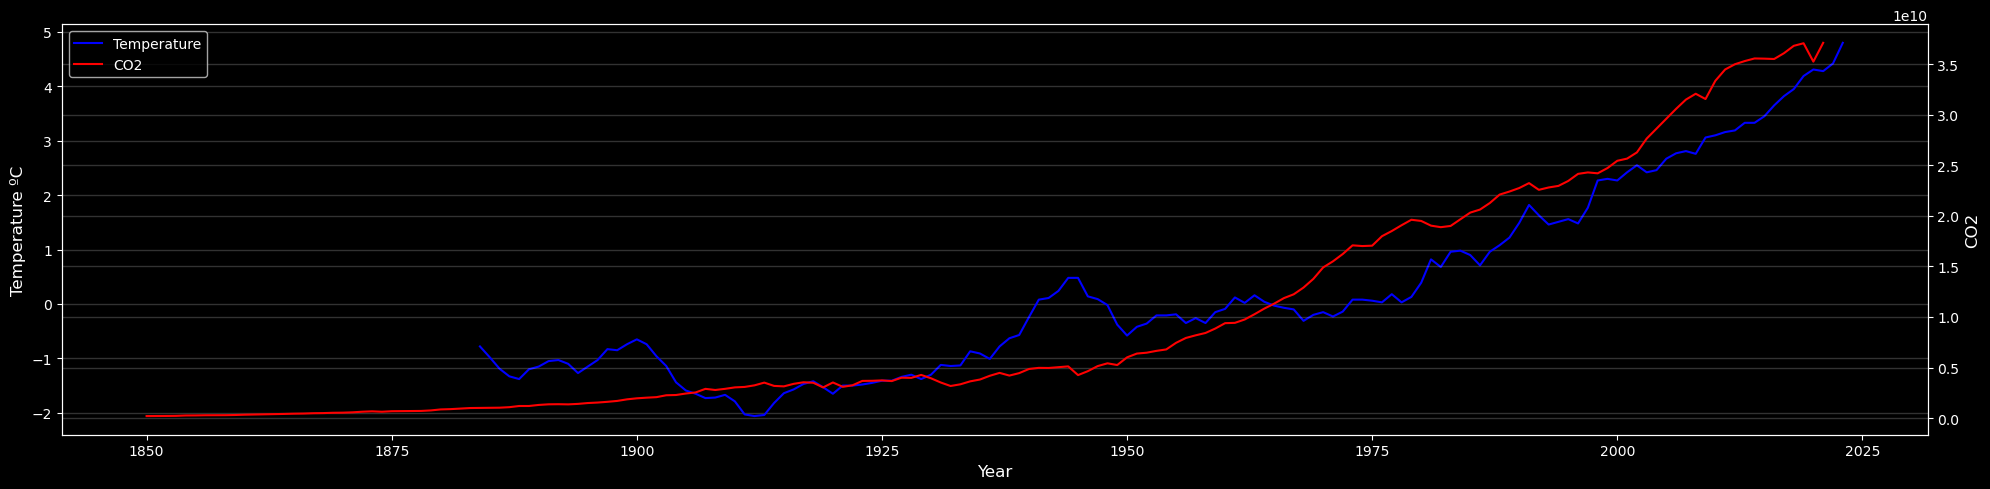

In [31]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(20,5))
font_size = 12

color1 = 'blue'
ax1.grid(which = "major", axis='y',linewidth = 1, alpha=0.2)
ax1.set_xlabel('Year', fontsize=font_size)
ax1.set_ylabel('Temperature ºC', fontsize=font_size)
ax1.plot(df['Year'], df['mov_avg'], color=color1, label='Temperature')

ax2 = ax1.twinx()  # a second axis with the same x-axis as ax1

color2 = 'red'
ax2.grid(which = "major", axis='y',linewidth = 1, alpha=0.2)

ax2.set_ylabel('CO2', fontsize=font_size)
ax2.plot(co2['Year'],co2['Annual CO₂ emissions'], color=color2, label='CO2')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

fig.tight_layout() 
plt.show()